Prepare the dataset and train a model on the data.

In [4]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.tabular_mia.utils.adult_data_preparation import (
    download_adult_dataset,
    get_adult_dataloaders,
    preprocess_adult_dataset,
)
from examples.mia.tabular_mia.utils.adult_model_preparation import AdultNet, create_trained_model_and_metadata

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

download_adult_dataset(path)
dataset = preprocess_adult_dataset(path)

n_features = dataset.x.shape[1]
n_classes = 1
train_loader, test_loader = get_adult_dataloaders(dataset, train_fraction=0.3, test_fraction=0.3)

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = AdultNet(input_size=n_features, hidden_size=64, num_classes=n_classes)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model,
                                                                               train_loader,
                                                                               test_loader,
                                                                               epochs=10)

Directory already exists: /home/johan/project/LeakPro/examples/mia/tabular_mia/data/


Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 10/10 [00:00<00:00, 17.38it/s]


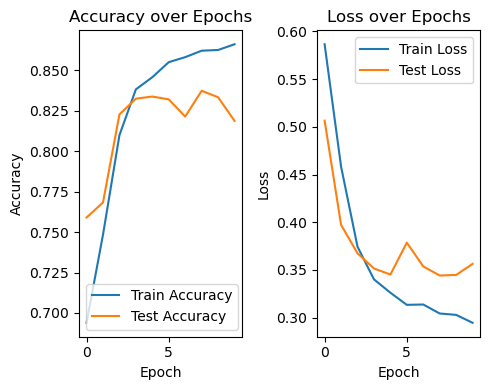

In [5]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Create LeakPro objects and run attack

In [6]:
from adult_handler import AdultInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(AdultInputHandler, config_path)

# Run the audit
leakpro.run_audit()

2024-12-15 12:43:20,063 INFO     Target model blueprint created from AdultNet in utils/adult_model_preparation.py.
2024-12-15 12:43:20,064 INFO     Loaded target model metadata from ./target/model_metadata.pkl
/home/johan/project/LeakPro/leakpro/input_handler/handler_setup.py:95: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for

AssertionError: Size mismatch between tensors